C:\Users\niyat\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


RMSE 111156.74360479308
MAPE [2649.69065571]
time_elapsed 0.3291609990001234


C:\Users\niyat\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


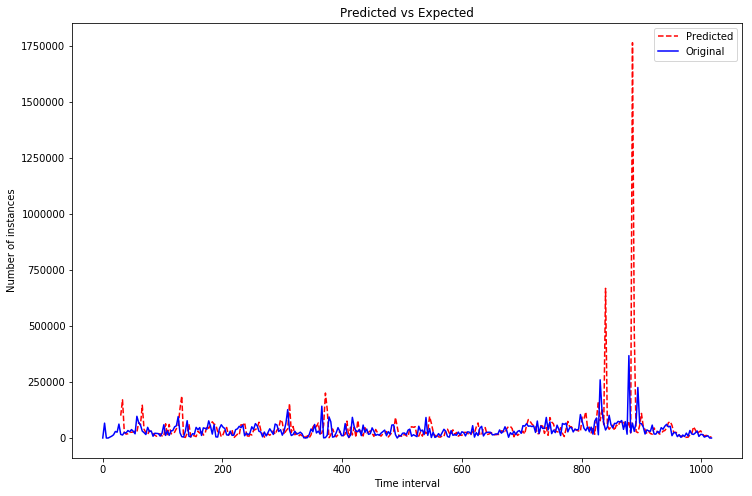

In [8]:
#AR MODEL WITH SLIDING WINDOW 
#referred from "https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/"

import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
import time
import math

time_start = time.clock()
df2=pd.read_csv('input_data.csv')
X = df2['no_of_instances'].values
time1=df2['time_interval'].values


aa=0
win=10
Begin=0
SE=0
sumAPE=0
time2=list()
pp=list()
for aa in range (Begin,(len(X)-win)):
    train=X[aa:(aa+win)]
    test=X[aa+win]
    model = AR(train)
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    
    if(yhat<0):
        #print('heeeeeeelllloooooo')
        predictions.append(test)
    else:
        predictions.append(yhat)
    history.append(test)
    t=aa+win
    tm=df2.time_interval[t]
    time2.append(tm)
    pp.append(predictions)
    #print('predicted value:',predictions)
    #print('expected value',test)
    e=abs(test-predictions)
    #print(e)
    SE=SE+e*e
    APE=abs((test-predictions)/test)
    #print('APE', APE)
    sumAPE=sumAPE+APE
#time_elapsed = (time.clock() - time_start)
#print('time_elapsed', time_elapsed)
##print(time2)
#print(pp)
RMSE=math.sqrt(SE/(len(X)-win))
print('RMSE',RMSE)
MAPE=(sumAPE/(len(X)-win))
print('MAPE',MAPE*100)

#computation time
time_elapsed = (time.clock() - time_start)
print('time_elapsed', time_elapsed)



fig=plt.figure(figsize=(12,8))
plt.title("Predicted vs Expected")
plt.xlabel("Time interval")
plt.ylabel("Number of instances")
plt.plot(time2, pp, color='red', label='Predicted',linestyle='dashed')


plt.plot(df2.time_interval, df2.no_of_instances, color='blue', label='Original',linestyle='solid')
plt.legend()
plt.show()


